In [1]:
#Choose GPUs and CPUs

#If want to choose GPU to use
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
#This will make it so that only the 0th GPU is visible to TensorFlow.
#In your case, you can choose any in the range [0, 3].
#If you wanted, for example, the 0th and 2nd GPUs to both be visible, replace "0" with "0,2"

import tensorflow as tf
from keras import backend as K

GPU=True
CPU=False
num_cores = 4

if GPU:
    num_GPU = 1
    num_CPU = 1
if CPU:
    num_CPU = 1
    num_GPU = 0

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU},\
#        gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.5))
                       )
session = tf.Session(config=config)
K.set_session(session)
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

Using TensorFlow backend.


# Reload all data from before

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import backend as K
from keras.utils import to_categorical

data_root = '.'
pickle_file = os.path.join(data_root, 'notMNIST.pickle')
ifile=open(pickle_file, 'r')
data=pickle.load(ifile)
ifile.close()

train_dataset=data['train_dataset']
train_labels=data['train_labels']
valid_dataset=data['valid_dataset']
valid_labels=data['valid_labels']
test_dataset=data['test_dataset']
test_labels=data['test_labels']
print ("Done")


train_labels=to_categorical(train_labels) #One-hot encoding, converts label to vector
test_labels=to_categorical(test_labels)               #with one 1 and rest 0s
print (train_labels.shape)

Done
(200000, 10)


# Try basic NN, no convolutional layer

In [3]:
#Reshape to 1D array for CNN
dims=train_dataset.shape
print (dims)
trainee=train_dataset.reshape(dims[0],dims[1]*dims[2])
dims=test_dataset.shape
testee=test_dataset.reshape(dims[0],dims[1]*dims[2])
print (trainee.shape)

K.clear_session()
np.random.seed(123)
model=Sequential()
model.add(Dense(800, input_shape=(784,), activation='relu')) #Contains 2 layers, input layer
                #with 784=shape of object and 1000 node hidden layer
model.add(Dropout(0.25))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())

model.fit(trainee, train_labels, batch_size=100, verbose=1, epochs=20)
score=model.evaluate(testee, test_labels, verbose=1)
print (score)

(200000, 28, 28)
(200000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)     

# O.K now try CNN

In [5]:
dims=train_dataset.shape
print (dims)
trainee=train_dataset.reshape(dims[0],dims[1],dims[2],1)
dims=test_dataset.shape
testee=test_dataset.reshape(dims[0],dims[1],dims[2],1)
print (trainee.shape)


from keras.layers import Conv2D, MaxPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import backend as K
from keras.utils import to_categorical

K.clear_session()
np.random.seed(123)
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1),data_format='channels_last'))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())

hist=model.fit(trainee, train_labels, batch_size=100, verbose=1, epochs=10, validation_split = 0.1)
score=model.evaluate(testee, test_labels, verbose=1)
print (score)

(200000, 28, 28)
(200000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 102

In [7]:
hist.history.keys()
epochs=hist.epoch
print (epochs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


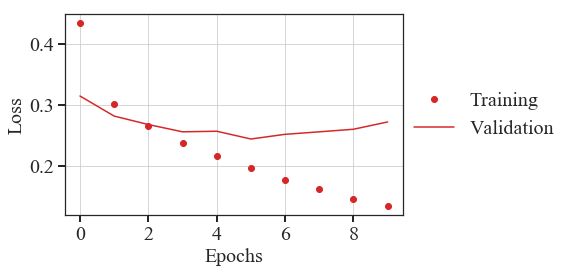

In [8]:
import matplotlib
plt.style.use('seaborn-white')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20
plt.plot(epochs,hist.history['loss'], 'C3o', label='Training')
plt.plot(epochs,hist.history['val_loss'], 'C3-', label='Validation')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.grid()
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=5)
#plt.savefig('figs/x_iters.png', dpi=200)

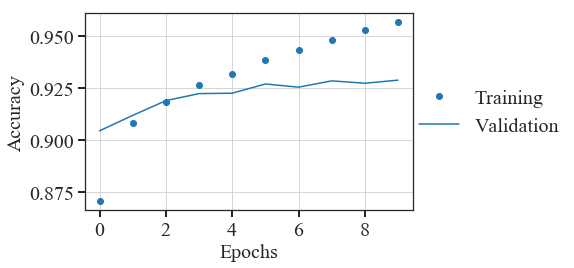

In [9]:
import matplotlib
plt.style.use('seaborn-white')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20
plt.plot(epochs,hist.history['acc'], 'C0o', label='Training')
plt.plot(epochs,hist.history['val_acc'], 'C0-', label='Validation')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid()
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=5)
#plt.savefig('figs/x_iters.png', dpi=200)

# Repeat but with only 6 epochs (training loss min at epoch 5)

In [10]:
dims=train_dataset.shape
print (dims)
trainee=train_dataset.reshape(dims[0],dims[1],dims[2],1)
dims=test_dataset.shape
testee=test_dataset.reshape(dims[0],dims[1],dims[2],1)
print (trainee.shape)


from keras.layers import Conv2D, MaxPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import backend as K
from keras.utils import to_categorical

K.clear_session()
np.random.seed(123)
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1),data_format='channels_last'))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())

hist2=model.fit(trainee, train_labels, batch_size=100, verbose=1, epochs=6, validation_split = 0.1)
score=model.evaluate(testee, test_labels, verbose=1)
print (score)

(200000, 28, 28)
(200000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 102

# Try a pre-trained model

In [4]:
dims=train_dataset.shape
print (dims)
trainee=train_dataset.reshape(dims[0],dims[1],dims[2],1)
dims=test_dataset.shape
testee=test_dataset.reshape(dims[0],dims[1],dims[2],1)
print (trainee.shape)

dims=train_dataset.shape
print (dims)
print (trainee.shape)
#VGG needs 3 channels, so repeat data
from tqdm import tqdm
dims=dims+(3,)#--THIS IS NEAT!
print (dims)
dataset3=np.zeros(dims,float)
for i in tqdm(range(dims[0])):
    dataset3[i,:,:,0],dataset3[i,:,:,1],dataset3[i,:,:,2]=train_dataset[i,:,:],train_dataset[i,:,:],train_dataset[i,:,:]

  4%|▍         | 8241/200000 [00:00<00:02, 82325.29it/s]

(200000, 28, 28)
(200000, 28, 28, 1)
(200000, 28, 28)
(200000, 28, 28, 1)
(200000, 28, 28, 3)


100%|██████████| 200000/200000 [00:02<00:00, 88607.12it/s]


In [ ]:
print (dataset3.shape)
#VGG needs atleast 48x48, so resample
def resample(diff3D,Nx,Ny): #Center and resample diffraction array to desired pixel spacing
    nx, ny, nz = diff3D.shape
    diff3D=zoom(diff3D, (float(Nx)/nx,float(Ny)/ny, 1), order=1)
    return diff3D

data=[]
from scipy.ndimage.interpolation import zoom
for i in tqdm(range(dims[0])):
    tmp=resample(dataset3[i,:,:,:],56,56)
    data.append(tmp)

dataset3=np.asarray(data)
print (dataset3.shape)

  0%|          | 107/200000 [00:00<03:08, 1061.61it/s]

(200000, 28, 28, 3)


100%|██████████| 200000/200000 [02:51<00:00, 1163.37it/s]


In [ ]:
K.clear_session()
batch_size=100
epochs=10
Nc=56
n_labels=dataset3.shape[0]
labels=train_labels

from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
from keras.models import Model, load_model
from keras.layers import GlobalMaxPooling2D
from keras.utils import np_utils

base_model=VGG16(input_shape=(Nc,Nc,3), 
                 weights='imagenet', include_top=False)
#base_model.layers.pop() #Pop out the current logistic layer
tmp = base_model.output

#Add a fully connected layer
#tmp=Flatten()(tmp)
tmp=GlobalMaxPooling2D(data_format='channels_last')(tmp)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(n_labels, activation='softmax')(tmp)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers[:15]:
    layer.trainable = False #Fix the first 17 layers
    
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
#Initial learning rate of 0.001, which is smaller than the learning rate for training scratch model (usually 0.01).
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

print (model.summary())

#                print "Training ..."
history=model.fit(dataset3, 
                np_utils.to_categorical(labels,n_labels),  
                batch_size=batch_size, epochs=epochs, verbose=1, validation_split = 0.1)